In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as shc

In [2]:
#to cluster the data for categorize the custemur
df=pd.read_csv("Wholesale customers data.csv")
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Channel,440.0,1.322727,0.468052,1.0,1.00,1.0,2.00,2.0
Region,440.0,2.543182,0.774272,1.0,2.00,3.0,3.00,3.0
Fresh,440.0,12000.297727,12647.328865,3.0,3127.75,8504.0,16933.75,112151.0
Milk,440.0,5796.265909,7380.377175,55.0,1533.00,3627.0,7190.25,73498.0
Grocery,440.0,7951.277273,9503.162829,3.0,2153.00,4755.5,10655.75,92780.0
Frozen,440.0,3071.931818,4854.673333,25.0,742.25,1526.0,3554.25,60869.0
Detergents_Paper,440.0,2881.493182,4767.854448,3.0,256.75,816.5,3922.00,40827.0
Delicassen,440.0,1524.870455,2820.105937,3.0,408.25,965.5,1820.25,47943.0


In [6]:
df.Channel.value_counts()

1    298
2    142
Name: Channel, dtype: int64

In [7]:
df.Region.value_counts()

3    316
1     77
2     47
Name: Region, dtype: int64

In [8]:
df.isna().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [13]:
df1=df.groupby(['Channel','Region'])['Fresh', 'Milk', 'Grocery','Frozen',
                                     'Detergents_Paper', 'Delicassen'].sum()
# y=df1.get_group((1,3))
df1

C:\Users\deept\AppData\Local\Temp/ipykernel_20252/3554410781.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df1=df.groupby(['Channel','Region'])['Fresh', 'Milk', 'Grocery','Frozen',


Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Channel Region                                                        
1       1        761233   228342   237542  184512             56081   
        2        326215    64519   123074  160861             13516   
        3       2928269   735753   820101  771606            165990   
2       1         93600   194112   332495   46514            148055   
        2        138506   174625   310200   29271            159795   
        3       1032308  1153006  1675150  158886            724420   

                Delicassen  
Channel Region              
1       1            70632  
        2            30965  
        3           320358  
2       1            33695  
        2            23541  
        3           191752

In [14]:
df1=df1.reset_index()
df1

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,1,1,761233,228342,237542,184512,56081,70632
1,1,2,326215,64519,123074,160861,13516,30965
2,1,3,2928269,735753,820101,771606,165990,320358
3,2,1,93600,194112,332495,46514,148055,33695
4,2,2,138506,174625,310200,29271,159795,23541
5,2,3,1032308,1153006,1675150,158886,724420,191752


In [17]:

df1['Total']=df['Fresh']+ df['Milk']+ df['Grocery']+df['Frozen']+df['Detergents_Paper']+df['Delicassen']
df1

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
0,1,1,761233,228342,237542,184512,56081,70632,34112
1,1,2,326215,64519,123074,160861,13516,30965,33266
2,1,3,2928269,735753,820101,771606,165990,320358,36610
3,2,1,93600,194112,332495,46514,148055,33695,27381
4,2,2,138506,174625,310200,29271,159795,23541,46100
5,2,3,1032308,1153006,1675150,158886,724420,191752,26710


Text(0.5, 1.0, 'Spend on Channel vs Region')

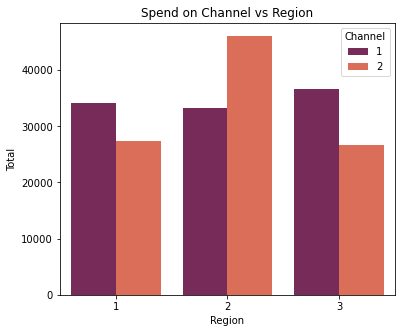

In [20]:
plt.figure(figsize=(6,5))
sns.barplot(data=df1,x='Region',y='Total',hue='Channel',palette='rocket')
plt.title('Spend on Channel vs Region')

In [ ]:
#2nd region on channel 2 spend more
#3rd region on channel 2 spend less

In [21]:
df['Total']=df['Fresh']+ df['Milk']+ df['Grocery']+df['Frozen']
+df['Detergents_Paper']+df['Delicassen']
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
0,2,3,12669,9656,7561,214,2674,1338,30100
1,2,3,7057,9810,9568,1762,3293,1776,28197
2,2,3,6353,8808,7684,2405,3516,7844,25250
3,1,3,13265,1196,4221,6404,507,1788,25086
4,2,3,22615,5410,7198,3915,1777,5185,39138


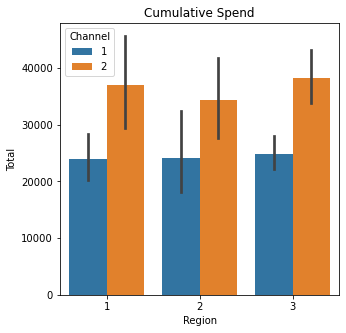

In [22]:
plt.figure(figsize=(5,5))
plt.title('Cumulative Spend')
g=sns.barplot(x='Region',y='Total',hue='Channel',data=df)


In [24]:
df2=df.groupby(['Channel','Region'])
df2.describe().T

Channel                            1                                \
Region                             1              2              3   
Fresh            count     59.000000      28.000000     211.000000   
                 mean   12902.254237   11650.535714   13878.052133   
                 std    12342.008901    8969.362752   14746.572913   
                 min      514.000000       3.000000       3.000000   
                 25%     4437.500000    4938.250000    3702.500000   
                 50%     8656.000000    9787.000000    9612.000000   
                 75%    18135.000000   17031.500000   18821.000000   
                 max    56083.000000   32717.000000  112151.000000   
Milk             count     59.000000      28.000000     211.000000   
                 mean    3870.203390    2304.250000    3486.981043   
                 std     4298.321195    2968.628697    4508.505269   
                 min      258.000000     333.000000      55.000000   
                 25%     1071.000000    1146.000000    1188.500000   
                 50%     2280.000000    1560.500000    2247.000000   
                 75%     4995.500000    2344.750000    4205.000000   
                 max    23527.000000   16784.000000   43950.000000   
Grocery          count     59.000000      28.000000     211.000000   
                 mean    4026.135593    4395.500000    3886.734597   
                 std     3629.644143    3048.298815    3593.506056   
                 min      489.000000    1330.000000       3.000000   
                 25%     1620.000000    2373.750000    1666.000000   
                 50%     2576.000000    3352.000000    2642.000000   
                 75%     5172.500000    5527.500000    4927.500000   
                 max    16966.000000   13626.000000   21042.000000   
Frozen           count     59.000000      28.000000     211.000000   
                 mean    3127.322034    5745.035714    3656.900474   
                 std     3276.460124   11454.478518    4956.590848   
                 min       91.000000     264.000000      25.000000   
                 25%      966.000000     962.250000     779.000000   
                 50%     1859.000000    2696.500000    1960.000000   
                 75%     4479.000000    4617.000000    4542.500000   
                 max    18711.000000   60869.000000   36534.000000   
Detergents_Paper count     59.000000      28.000000     211.000000   
                 mean     950.525424     482.714286     786.682464   
                 std     1305.907616     425.310506    1099.970640   
                 min        5.000000      15.000000       3.000000   
                 25%      237.000000     182.750000     176.500000   
                 50%      412.000000     325.000000     375.000000   
                 75%      874.000000     707.000000     948.500000   
                 max     5828.000000    1679.000000    6907.000000   
Delicassen       count     59.000000      28.000000     211.000000   
                 mean    1197.152542    1105.892857    1518.284360   
                 std     1219.945304    1056.778800    3663.183304   
                 min        7.000000      51.000000       3.000000   
                 25%      374.000000     567.250000     378.500000   
                 50%      749.000000     883.000000     823.000000   
                 75%     1621.500000    1146.000000    1582.000000   
                 max     6854.000000    5609.000000   47943.000000   
Total            count     59.000000      28.000000     211.000000   
                 mean   23925.915254   24095.321429   24908.668246   
                 std    15706.272415   21543.554303   21220.053902   
                 min     3953.000000    3519.000000     889.000000   
                 25%    13629.000000   15577.250000   12155.500000   
                 50%    20245.000000   20867.000000   18609.000000   
                 75%    27522.500000   26878.750000   31199.500000   
          

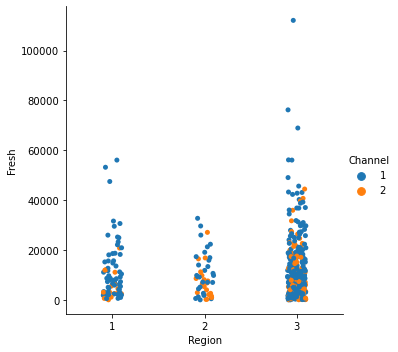

In [25]:
sns.catplot(x='Region',y='Fresh',hue='Channel',data=df)

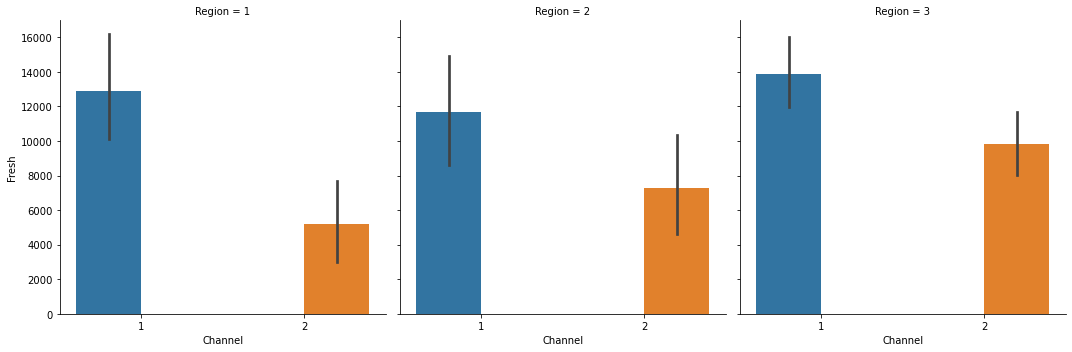

In [26]:
sns.catplot(x='Channel',y='Fresh',hue='Channel',col='Region',data=df,kind='bar')

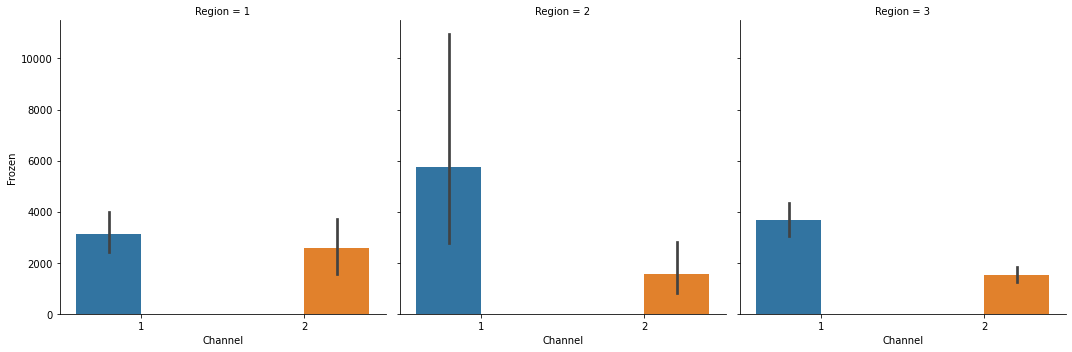

In [27]:
sns.catplot(x='Channel',y='Frozen',hue='Channel',col='Region',data=df,kind='bar')

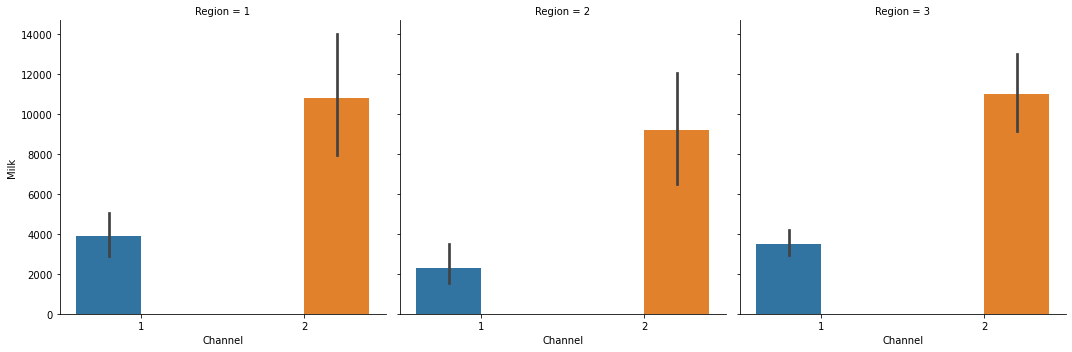

In [28]:
sns.catplot(x='Channel',y='Milk',hue='Channel',col='Region',data=df,kind='bar')

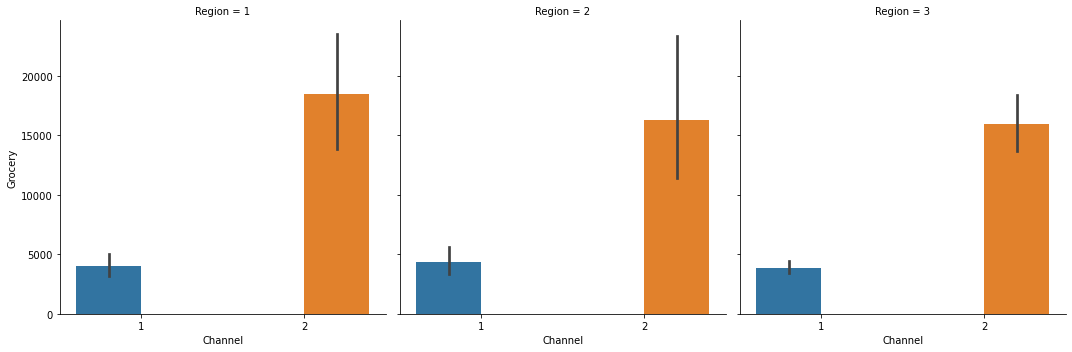

In [29]:
sns.catplot(x='Channel',y='Grocery',hue='Channel',col='Region',data=df,kind='bar')

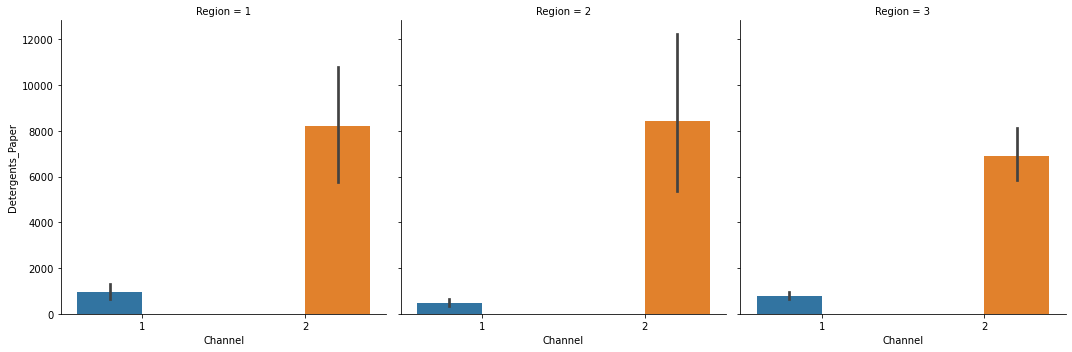

In [30]:
sns.catplot(x='Channel',y='Detergents_Paper',hue='Channel',col='Region',data=df,kind='bar')

In [39]:
items=['Fresh','Milk','Grocery','Frozen','Detergents_Paper','Delicassen']
cv_list=[]
for i in items:
    print('The coefficient of variation for {} is:'.format(i))
    m=df[i].mean()
    s=df[i].std()
    cv=round(s/m,3)
    print(cv)
    cv_list.append(cv)

The coefficient of variation for Fresh is:
1.054
The coefficient of variation for Milk is:
1.273
The coefficient of variation for Grocery is:
1.195
The coefficient of variation for Frozen is:
1.58
The coefficient of variation for Detergents_Paper is:
1.655
The coefficient of variation for Delicassen is:
1.849


In [40]:
cv_list

[1.054, 1.273, 1.195, 1.58, 1.655, 1.849]

<AxesSubplot:>

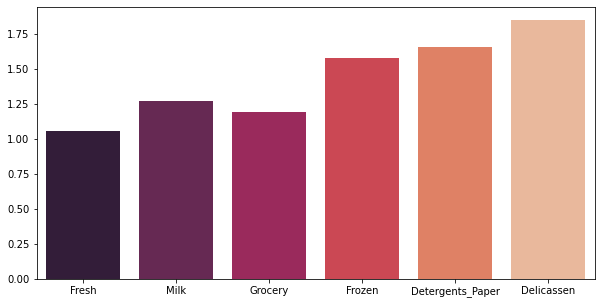

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x=items,y=cv_list,palette='rocket')

C:\Users\deept\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\deept\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\deept\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\deept\anaconda3\lib\si

<AxesSubplot:xlabel='Delicassen'>

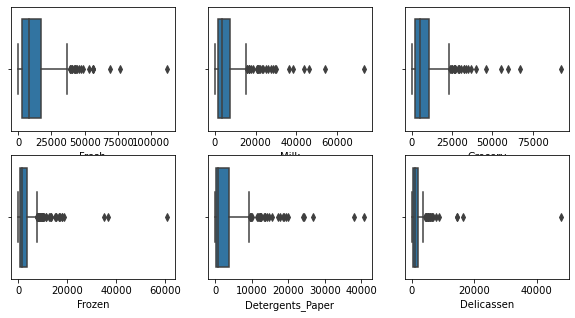

In [48]:
plt.figure(figsize=(10,5))
plt.subplot(2,3,1)
sns.boxplot(df['Fresh'])

plt.subplot(2,3,2)
sns.boxplot(df['Milk'])

plt.subplot(2,3,3)
sns.boxplot(df['Grocery'])

plt.subplot(2,3,4)
sns.boxplot(df['Frozen'])

plt.subplot(2,3,5)
sns.boxplot(df['Detergents_Paper'])

plt.subplot(2,3,6)
sns.boxplot(df['Delicassen'])

In [ ]:
#normalizing the data

In [49]:
from sklearn.preprocessing import normalize
scaled_df=normalize(df)
scaled_df

array([[5.71217156e-05, 8.56825734e-05, 3.61837507e-01, ...,
        7.63717338e-02, 3.82144277e-02, 8.59681820e-01],
       [6.17284696e-05, 9.25927044e-05, 2.17808905e-01, ...,
        1.01635925e-01, 5.48148810e-02, 8.70278829e-01],
       [6.68816855e-05, 1.00322528e-04, 2.12449674e-01, ...,
        1.17578003e-01, 2.62309970e-01, 8.44381279e-01],
       ...,
       [2.75398305e-05, 4.13097457e-05, 2.00090638e-01, ...,
        2.04359312e-01, 2.57084317e-02, 8.35820085e-01],
       [5.25636055e-05, 1.57690817e-04, 5.40879501e-01, ...,
        8.83068573e-03, 1.11697662e-01, 8.16890993e-01],
       [1.22143249e-04, 3.66429748e-04, 3.40413236e-01, ...,
        5.82623299e-02, 6.35144896e-03, 8.62331340e-01]])

In [50]:
data=pd.DataFrame(scaled_df,columns=df.columns)

In [51]:
data

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,Total
0,0.000057,0.000086,0.361838,0.275784,0.215949,0.006112,0.076372,0.038214,0.859682
1,0.000062,0.000093,0.217809,0.302778,0.295309,0.054383,0.101636,0.054815,0.870279
2,0.000067,0.000100,0.212450,0.294547,0.256959,0.080425,0.117578,0.262310,0.844381
3,0.000034,0.000102,0.449989,0.040572,0.143189,0.217243,0.017199,0.060654,0.850994
4,0.000043,0.000064,0.485512,0.116145,0.154531,0.084049,0.038150,0.111315,0.840237
...,...,...,...,...,...,...,...,...,...
435,0.000012,0.000037,0.368680,0.149579,0.198930,0.163034,0.002259,0.027357,0.880224
436,0.000016,0.000049,0.646904,0.023598,0.012599,0.074374,0.001534,0.038688,0.757475
437,0.000028,0.000041,0.200091,0.213268,0.416444,0.006017,0.204359,0.025708,0.835820
438,0.000053,0.000158,0.540880,0.104129,0.117322,0.054561,0.008831,0.111698,0.816891


C:\Users\deept\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Fresh'>

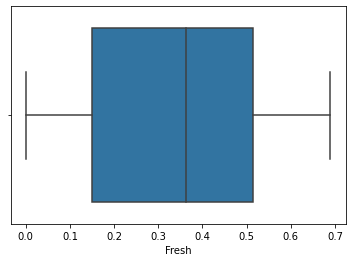

In [52]:
sns.boxplot(data['Fresh'])

In [9]:
import scipy.cluster.hierarchy as shc

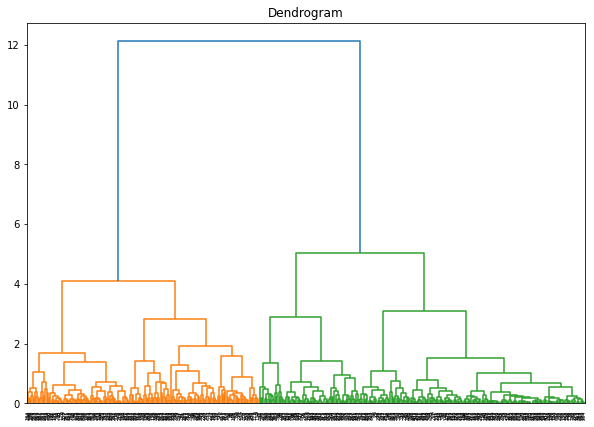

In [12]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dend=shc.dendrogram(shc.linkage(data,method='ward'))#method ward=variance,single=minimum,complete=maximum,aver age,while doing clustering 
#after clustering first group consider the variance/min/max/ave

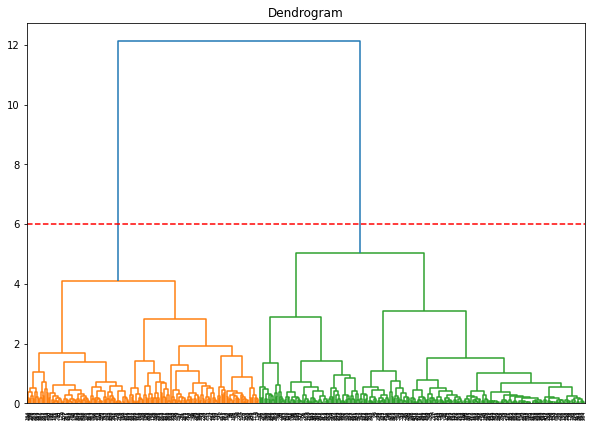

In [14]:
plt.figure(figsize=(10,7))
plt.title('Dendrogram')
dend=shc.dendrogram(shc.linkage(data,method='ward'))
plt.axhline(y=6,color='r',linestyle='--')# based on height of vertical line 

In [15]:
from sklearn.cluster import AgglomerativeClustering
model=AgglomerativeClustering(n_clusters=2,linkage='ward')
clusters=model.fit_predict(data)
clusters

array([1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,

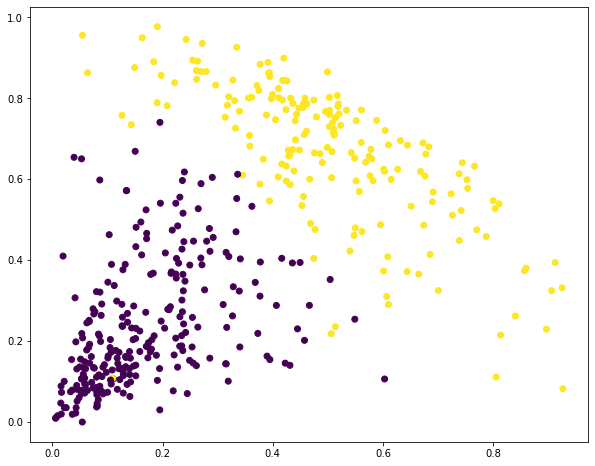

In [17]:
plt.figure(figsize=(10,8))
plt.scatter(data.Milk,data.Grocery,c=clusters)

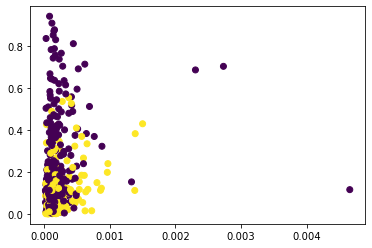

In [18]:
plt.scatter(data.Region,data.Frozen,c=clusters)